<a href="https://colab.research.google.com/github/niteshydv01/ML-LAB-102217260/blob/main/ML_Assaignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Fold Cross Validation for Multiple Linear Regression (Least Square Error Fit)

Download the dataset regarding USA House Price Prediction from the following link:

https://drive.google.com/file/d/1O_NwpJT-8xGfU_-3llUl2sgPu0xllOrX/view?usp=sharing

Load the dataset and Implement 5- fold cross validation for multiple linear regression

(using least square error fit).
Steps:

a) Divide the dataset into input features (all columns except price) and output variable
(price)

b) Scale the values of input features.

c) Divide input and output features into five folds.

d) Run five iterations, in each iteration consider one-fold as test set and remaining
four sets as training set. Find the beta (𝛽) matrix, predicted values, and R2_score
for each iteration using least square error fit.


e) Use the best value of (𝛽) matrix (for which R2_score is maximum), to train the
regressor for 70% of data and test the performance for remaining 30% data.

#Reading Dataset

In [ ]:
import pandas as pd
df=pd.read_csv("/content/USA_Housing.csv")

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


# Separate input features (X) and output variable (y)

In [ ]:
# Output variable ('Price')
X= df.drop('Price', axis=1)  # Input features (all columns except 'Price')
y = df['Price']  # Output variable ('Price')


In [ ]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [ ]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


# Checking for NULL Value and Noise

In [ ]:
# Check for null values in X
print("Null values in each column of X:\n")
print(X.isnull().sum())

Null values in each column of X:

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
dtype: int64



Summary statistics of input features (X):

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562390             5.322283                   6.299250   
50%        68804.286405             5.970429                   7.002902   
75%        75783.338665             6.650808                   7.665871   
max       107701.748400             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population  
count                   5000.000000      5000.000000  
mean                       3.981330     36163.516039  
std                        1.234137      9925.650114  
min                        2.000000       172.610686  
25%  

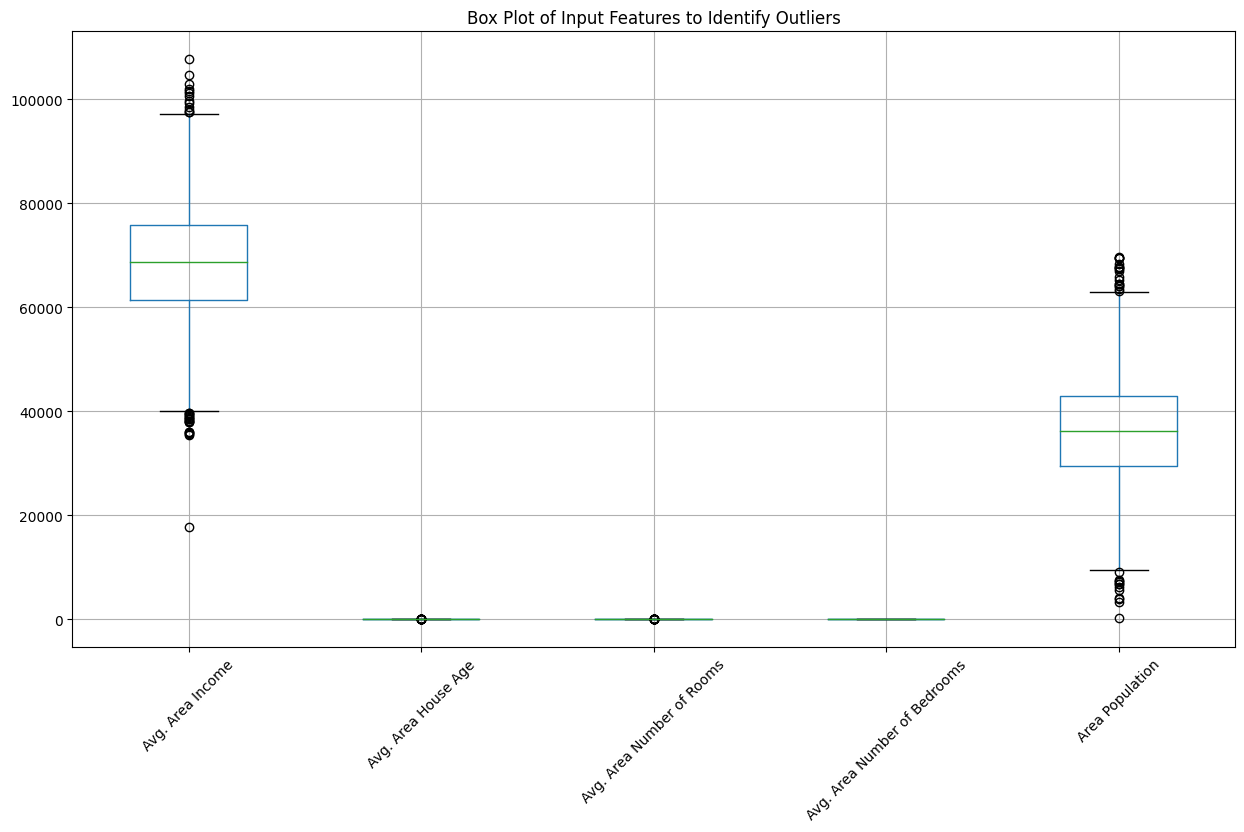

In [ ]:

print("\nSummary statistics of input features (X):\n")
print(X.describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
X.boxplot()
plt.title('Box Plot of Input Features to Identify Outliers')
plt.xticks(rotation=45)
plt.show()

#Removing Outliers

In [ ]:
# Detect and remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1
        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of input feature columns to check for outliers
input_features = X.columns.tolist()

# Combine X and y back into a single DataFrame to keep the relationship between features and target
data = pd.concat([X, y], axis=1)

# Remove outliers from the data
cleaned_data = remove_outliers_iqr(data, input_features)

# Separate the cleaned input features (X) and output variable (y) again
X_cleaned = cleaned_data.drop('Price', axis=1)
y_cleaned = cleaned_data['Price']

In [ ]:
X_cleaned.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [ ]:
X_cleaned.shape

(4889, 5)

In [ ]:
X.shape

(5000, 5)

In [ ]:
y_cleaned.shape

(4889,)

#Check for correlation

In [ ]:
data_for_correlation = pd.concat([X_cleaned,y_cleaned], axis=1)

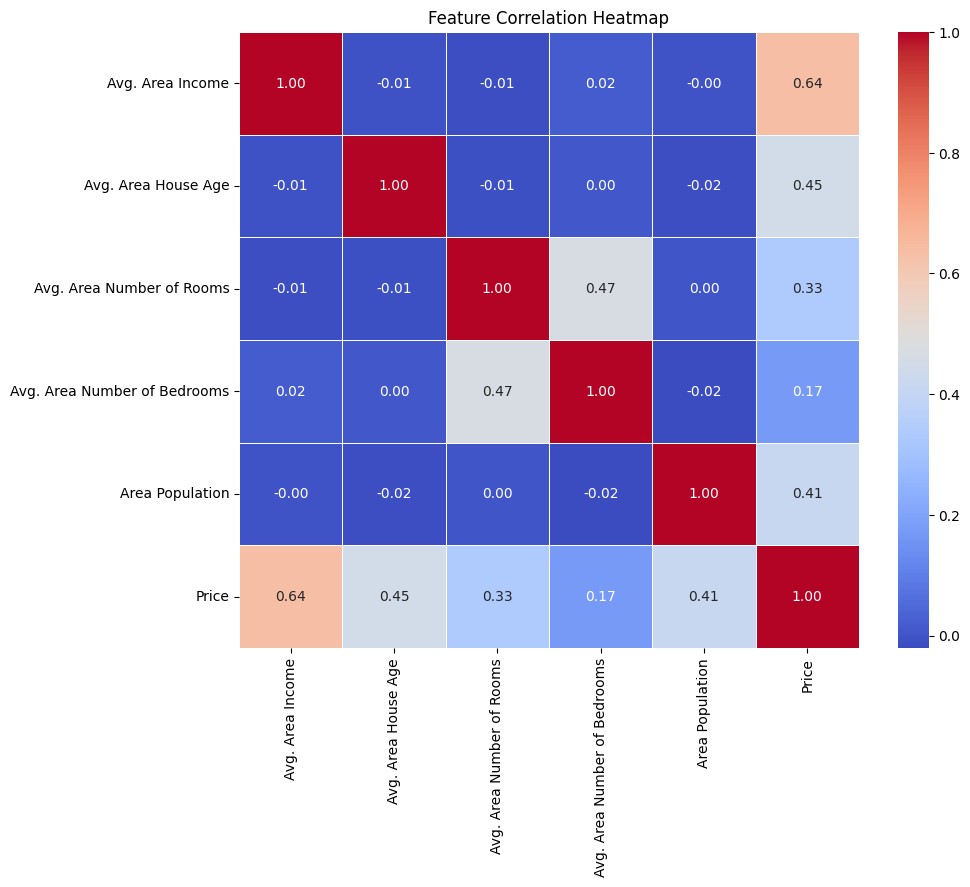

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr_matrix = data_for_correlation.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
# Identify features with correlation above 80%
threshold = 0.8
# Create a set to hold the correlated feature columns
to_drop = set()

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            # Get the name of the column to drop
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

# Drop the correlated columns from the DataFrame
df_reduced = data_for_correlation.drop(columns=to_drop)

print(f"Features dropped due to high correlation: {to_drop}")


Features dropped due to high correlation: set()


In [ ]:
print("Remaining Features:")
print(df_reduced.columns)


Remaining Features:
Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')


In [ ]:
X_corr = df_reduced.drop('Price', axis=1)  # Input features (all columns except 'Price')
y_corr = df_reduced['Price']  # Output variable ('Price')

In [ ]:
X_corr.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [ ]:
y_corr.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


# Scale the input features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_corr)

In [ ]:

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X_scaled_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.050104,-0.305056,0.022600,0.085018,-1.351502
1,1.021517,0.025291,-0.259717,-0.724934,0.417978
2,-0.708414,-0.116132,1.547477,0.927368,0.077166
3,-0.510185,1.248806,-1.420046,-0.587242,-0.189185
4,-0.834090,-0.968052,0.864582,0.198411,-1.013134


In [ ]:
X_scaled.shape

(4889, 5)

#K-FOLD TO DETERMINE BEST BETA VALUES


Fold 1
R2 Score: 0.9193852982512449

Fold 2
R2 Score: 0.9104593195244839

Fold 3
R2 Score: 0.9145401709249231

Fold 4
R2 Score: 0.9139842982806456

Fold 5
R2 Score: 0.9145613834096045

Best R2 Score obtained in fold 1: 0.9193852982512449
Best Beta Coefficients:
[1.23291873e+06 2.23441521e+05 1.60381701e+05 1.19754548e+05
 1.01636196e+03 1.45666363e+05]

R2 Score on 30% test data using best beta: 0.9172644712156482


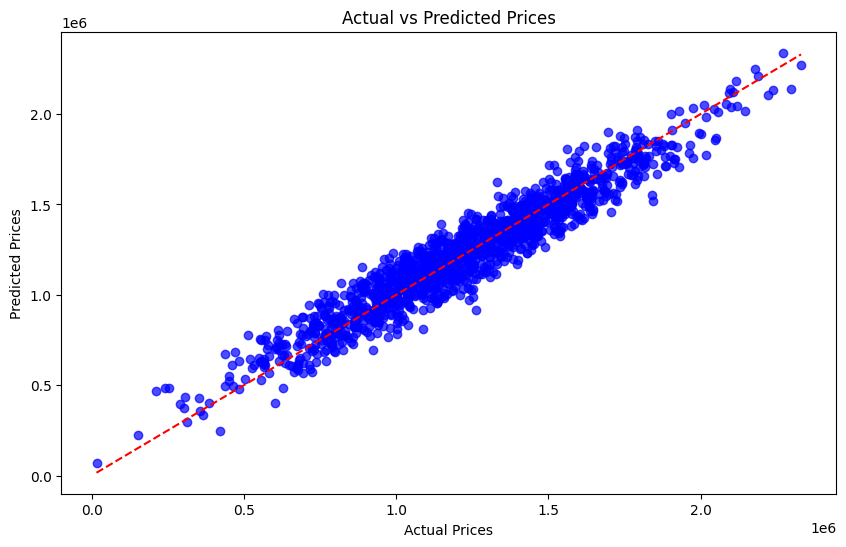

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Convert y_corr to a numpy array for consistent indexing
y_corr_np = np.array(y_corr)

# Store R2 scores and beta coefficients for each fold
r2_scores = []
beta_coefficients = []

# Iterate through each fold
fold = 1
for train_index, test_index in kf.split(X_scaled):
    print(f"\nFold {fold}")

    # Split the data into training and testing sets using numpy array indexing
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_corr_np[train_index], y_corr_np[test_index]

    # Convert to numpy arrays (if not already numpy arrays)
    X_train_np = np.array(X_train)
    X_test_np = np.array(X_test)
    y_train_np = np.array(y_train).reshape(-1, 1)
    y_test_np = np.array(y_test).reshape(-1, 1)

    # Add intercept term to X_train and X_test
    ones_train = np.ones((X_train_np.shape[0], 1))
    ones_test = np.ones((X_test_np.shape[0], 1))

    X_train_b = np.hstack([ones_train, X_train_np])
    X_test_b = np.hstack([ones_test, X_test_np])

    # Calculate beta coefficients using Normal Equation
    beta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train_np)

    # Make predictions on the test set
    y_pred = X_test_b.dot(beta)

    # Calculate R2 score
    r2 = r2_score(y_test_np, y_pred)

    # Append results
    r2_scores.append(r2)
    beta_coefficients.append(beta)

    print(f"R2 Score: {r2}")

    fold += 1

# Find the index of the best R2 score
best_index = np.argmax(r2_scores)
best_beta = beta_coefficients[best_index]

print(f"\nBest R2 Score obtained in fold {best_index + 1}: {r2_scores[best_index]}")
print("Best Beta Coefficients:")
print(best_beta.flatten())

# Split the entire dataset into 70% training and 30% testing
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_scaled, y_corr_np, test_size=0.3, random_state=42)

# Convert to numpy arrays
X_train_full_np = np.array(X_train_full)
X_test_full_np = np.array(X_test_full)
y_train_full_np = np.array(y_train_full).reshape(-1, 1)
y_test_full_np = np.array(y_test_full).reshape(-1, 1)

# Add intercept term
ones_train_full = np.ones((X_train_full_np.shape[0], 1))
ones_test_full = np.ones((X_test_full_np.shape[0], 1))

X_train_full_b = np.hstack([ones_train_full, X_train_full_np])
X_test_full_b = np.hstack([ones_test_full, X_test_full_np])

# Make predictions on the test set using best beta
y_pred_full = X_test_full_b.dot(best_beta)

# Calculate R2 score
r2_full = r2_score(y_test_full_np, y_pred_full)

print(f"\nR2 Score on 30% test data using best beta: {r2_full}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_full, y_pred_full, alpha=0.7, color='b')
plt.plot([y_test_full.min(), y_test_full.max()], [y_test_full.min(), y_test_full.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


#CHECKING TRAINING ACCURACY AND TEST ACCURACY

R2 Score on 70% training data using best beta: 0.9139694736894395
R2 Score on 30% test data using best beta: 0.9172644712014895


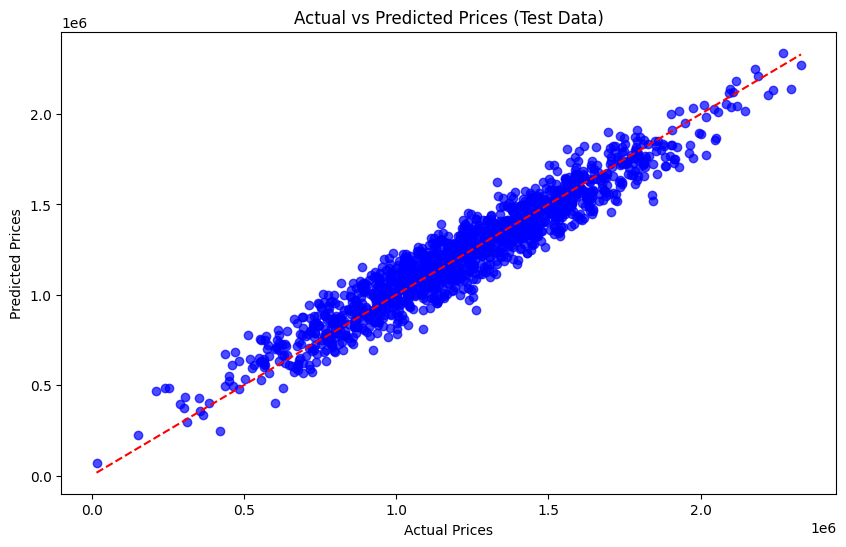

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Best Beta Coefficients obtained from K-Fold cross-validation
best_beta = np.array([1.23291873e+06, 2.23441521e+05, 1.60381701e+05, 1.19754548e+05,
                      1.01636196e+03, 1.45666363e+05])

# Split the entire dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_corr_np, test_size=0.3, random_state=42)

# Convert to numpy arrays
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train).reshape(-1, 1)
y_test_np = np.array(y_test).reshape(-1, 1)

# Add intercept term to X_train and X_test
ones_train = np.ones((X_train_np.shape[0], 1))
ones_test = np.ones((X_test_np.shape[0], 1))

X_train_b = np.hstack([ones_train, X_train_np])
X_test_b = np.hstack([ones_test, X_test_np])

# Make predictions on the training set using best beta
y_train_pred = X_train_b.dot(best_beta)

# Make predictions on the test set using best beta
y_test_pred = X_test_b.dot(best_beta)

# Calculate R2 score on training and test data
r2_train = r2_score(y_train_np, y_train_pred)
r2_test = r2_score(y_test_np, y_test_pred)

print(f"R2 Score on 70% training data using best beta: {r2_train}")
print(f"R2 Score on 30% test data using best beta: {r2_test}")

# Plot Actual vs Predicted Prices for Test Data
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, y_test_pred, alpha=0.7, color='b')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Test Data)')
plt.show()
